In [2]:
import pandas as pd

# Load data
df = pd.read_csv('../data/retail_sales_dataset.csv')

# View the first 5 rows
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Inspect columns, types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
# List all column names
print(df.columns)

# See unique values for object-type columns
for col in df.select_dtypes('object').columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:10])  # Show up to 10 unique values for review


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

Column: Date
['2023-11-24' '2023-02-27' '2023-01-13' '2023-05-21' '2023-05-06'
 '2023-04-25' '2023-03-13' '2023-02-22' '2023-12-13' '2023-10-07']

Column: Customer ID
['CUST001' 'CUST002' 'CUST003' 'CUST004' 'CUST005' 'CUST006' 'CUST007'
 'CUST008' 'CUST009' 'CUST010']

Column: Gender
['Male' 'Female']

Column: Product Category
['Beauty' 'Clothing' 'Electronics']


In [5]:
# Check if any nulls in columns, helps plan cleaning
df.isna().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
# Clean and type-cast key columns
# If 'Total Amount' or 'Quantity' seem like strings, convert them
df['Total Amount'] = pd.to_numeric(df['Total Amount'].replace('[\$,]', '', regex=True), errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Convert 'Date' column to pandas datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [7]:
# Confirm new dtypes
df.dtypes
# Preview again to see cleaned values
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month-year for time analysis
df['Month'] = df['Date'].dt.to_period('M')

# Create age group bins for demographic analysis
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


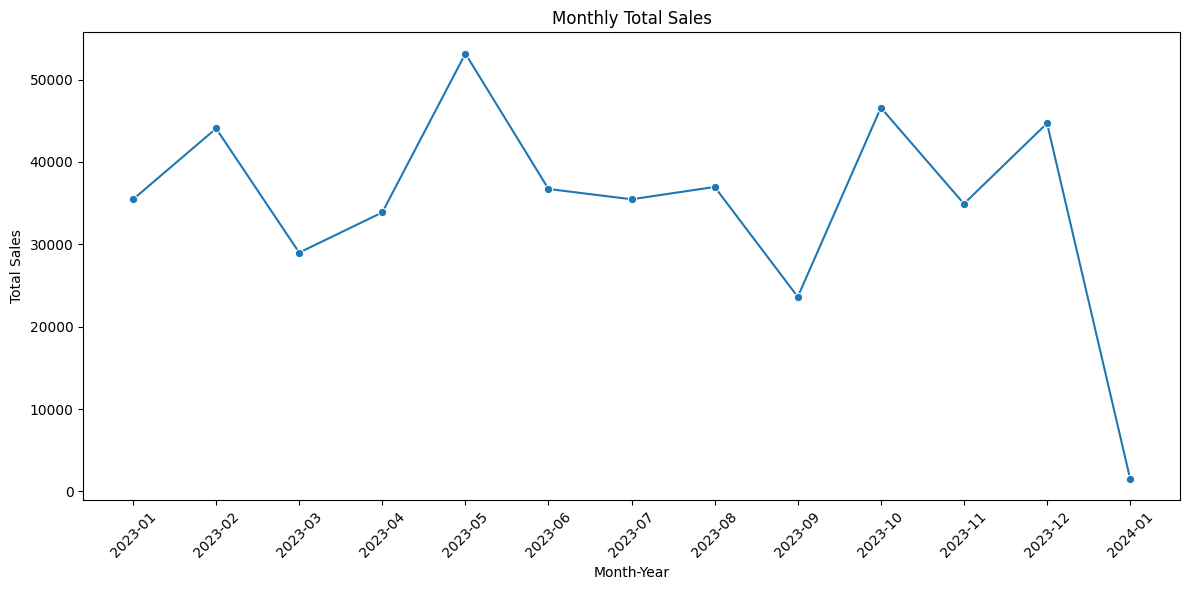

In [11]:
# Ensure 'Month' is a string for plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales, marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/monthly_sales.png')
plt.show()


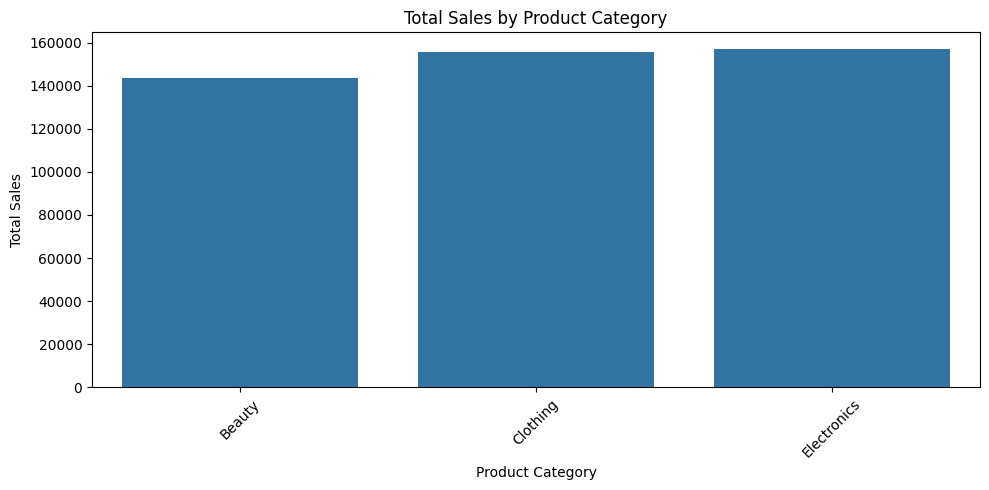

In [12]:
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Product Category', y='Total Amount', data=sales_by_category)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/sales_by_category.png')
plt.show()


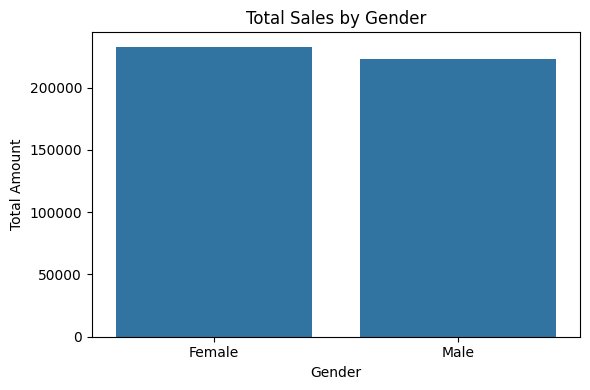

C:\Users\Admin\AppData\Local\Temp\ipykernel_21332\3445691981.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_agegroup = df.groupby('Age Group')['Total Amount'].sum().reset_index()


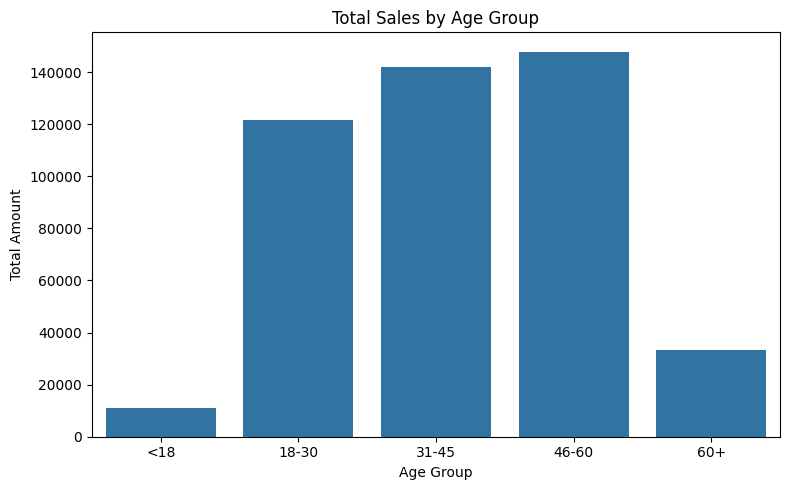

In [13]:
# Sales by Gender
sales_by_gender = df.groupby('Gender')['Total Amount'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Total Amount', data=sales_by_gender)
plt.title('Total Sales by Gender')
plt.tight_layout()
plt.savefig('../images/sales_by_gender.png')
plt.show()

# Sales by Age Group
sales_by_agegroup = df.groupby('Age Group')['Total Amount'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Age Group', y='Total Amount', data=sales_by_agegroup)
plt.title('Total Sales by Age Group')
plt.tight_layout()
plt.savefig('../images/sales_by_agegroup.png')
plt.show()


In [14]:
total_sales = df['Total Amount'].sum()
print(f"Total Sales: {total_sales:,.2f}")


Total Sales: 456,000.00


In [15]:
aov = df['Total Amount'].mean()
print(f"Average Order Value (AOV): {aov:,.2f}")


Average Order Value (AOV): 456.00


In [16]:
total_quantity = df['Quantity'].sum()
print(f"Total Quantity Sold: {total_quantity:,}")


Total Quantity Sold: 2,514


In [17]:
average_basket_size = df['Quantity'].mean()
print(f"Average Basket Size (Qty/Transaction): {average_basket_size:.2f}")


Average Basket Size (Qty/Transaction): 2.51


In [18]:
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(5)
print("Top 5 Product Categories by Sales:")
print(sales_by_category)


Top 5 Product Categories by Sales:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [19]:
# Sales by Gender
sales_by_gender = df.groupby('Gender')['Total Amount'].sum()
print("\nTotal Sales by Gender:")
print(sales_by_gender)

# Sales by Age Group
sales_by_agegroup = df.groupby('Age Group')['Total Amount'].sum()
print("\nTotal Sales by Age Group:")
print(sales_by_agegroup)



Total Sales by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

Total Sales by Age Group:
Age Group
<18       11215
18-30    121730
31-45    141955
46-60    147875
60+       33225
Name: Total Amount, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_21332\1798915655.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_agegroup = df.groupby('Age Group')['Total Amount'].sum()


In [20]:
monthly_sales_summary = df.groupby(df['Month'].astype(str))['Total Amount'].sum()
print("\nMonthly Total Sales:")
print(monthly_sales_summary)



Monthly Total Sales:
Month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Name: Total Amount, dtype: int64


In [21]:
customer_count = df['Customer ID'].nunique()
print(f"\nNumber of Unique Customers: {customer_count}")



Number of Unique Customers: 1000


In [22]:
customer_tx_counts = df['Customer ID'].value_counts()
repeat_customers = (customer_tx_counts > 1).sum()
repeat_customer_rate = repeat_customers / customer_count * 100
print(f"Repeat Customer Rate: {repeat_customer_rate:.1f}%  (customers with >1 purchase)")


Repeat Customer Rate: 0.0%  (customers with >1 purchase)


In [23]:
# Create a pivot: each row = month, each column = category, values = total sales
monthly_category_sales = pd.pivot_table(
    df,
    index=df['Month'].astype(str),
    columns='Product Category',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)
print("\nMonthly Sales by Category:")
print(monthly_category_sales.round(2))



Monthly Sales by Category:
Product Category  Beauty  Clothing  Electronics
Month                                          
2023-01            12430     13125         9895
2023-02            14035     14560        15465
2023-03            10545     15065         3380
2023-04            11905     13940         8025
2023-05            12450     17455        23245
2023-06            10995     10170        15550
2023-07            16090      8250        11125
2023-08             9790     12455        14715
2023-09             6320      9975         7325
2023-10            15355     13315        17910
2023-11             9700     15200        10020
2023-12            12400     12070        20220
2024-01             1500         0           30


In [24]:
monthly_gender_sales = pd.pivot_table(
    df,
    index=df['Month'].astype(str),
    columns='Gender',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)
print("\nMonthly Sales by Gender:")
print(monthly_gender_sales.round(2))



Monthly Sales by Gender:
Gender   Female   Male
Month                 
2023-01   24725  10725
2023-02   14395  29665
2023-03   13320  15670
2023-04   17300  16570
2023-05   23930  29220
2023-06   16875  19840
2023-07   16885  18580
2023-08   22080  14880
2023-09   16535   7085
2023-10   26600  19980
2023-11   14890  20030
2023-12   25305  19385
2024-01       0   1530


In [25]:
monthly_total_qty = df.groupby(df['Month'].astype(str))['Quantity'].sum()
print("\nMonthly Total Quantity Sold:")
print(monthly_total_qty)

monthly_category_qty = pd.pivot_table(
    df,
    index=df['Month'].astype(str),
    columns='Product Category',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)
print("\nMonthly Quantity Sold by Category:")
print(monthly_category_qty.round(0))



Monthly Total Quantity Sold:
Month
2023-01    195
2023-02    214
2023-03    194
2023-04    214
2023-05    259
2023-06    197
2023-07    176
2023-08    227
2023-09    170
2023-10    252
2023-11    205
2023-12    207
2024-01      4
Name: Quantity, dtype: int64

Monthly Quantity Sold by Category:
Product Category  Beauty  Clothing  Electronics
Month                                          
2023-01               59        72           64
2023-02               68        75           71
2023-03               51       111           32
2023-04               69        93           52
2023-05               65        97           97
2023-06               66        67           64
2023-07               70        45           61
2023-08               62        78           87
2023-09               50        60           60
2023-10               83        74           95
2023-11               63        69           73
2023-12               62        53           92
2024-01                3        

In [26]:
# Overall
sales_by_agegroup = df.groupby('Age Group')['Total Amount'].sum()
print("\nTotal Sales by Age Group:")
print(sales_by_agegroup)

# Monthly Age Group Pivot
monthly_agegroup_sales = pd.pivot_table(
    df,
    index=df['Month'].astype(str),
    columns='Age Group',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)
print("\nMonthly Sales by Age Group:")
print(monthly_agegroup_sales.round(2))



Total Sales by Age Group:
Age Group
<18       11215
18-30    121730
31-45    141955
46-60    147875
60+       33225
Name: Total Amount, dtype: int64

Monthly Sales by Age Group:
Age Group   <18  18-30  31-45  46-60   60+
Month                                     
2023-01      90   8090  13870  12880   520
2023-02     620  18235  13195  10360  1650
2023-03    1300   8360   7130   8550  3650
2023-04    1200   5735  21295   3765  1875
2023-05     740  13890   9775  23795  4950
2023-06      50  10520  12445  10715  2985
2023-07      90  13790   7765  10430  3390
2023-08       0   9630   5010  18770  3550
2023-09     225   8360   5200   7095  2740
2023-10     100  10345  15565  15675  4895
2023-11    6700   7645   9425  10020  1130
2023-12     100   7130  19780  15790  1890
2024-01       0      0   1500     30     0


C:\Users\Admin\AppData\Local\Temp\ipykernel_21332\3991847447.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_agegroup = df.groupby('Age Group')['Total Amount'].sum()
C:\Users\Admin\AppData\Local\Temp\ipykernel_21332\3991847447.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  monthly_agegroup_sales = pd.pivot_table(
